In [66]:
# Import required libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

In [101]:
# load the model
model = ResNet50(weights='imagenet')
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

# Visualize filters

In [56]:
# Print the shapes of all the filters
for idx, layer in enumerate(model.layers):
  # check for convolutional layer
  if '_conv' not in layer.name:
      continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(idx, layer.name, filters.shape)

2 conv1_conv (7, 7, 3, 64)
7 conv2_block1_1_conv (1, 1, 64, 64)
10 conv2_block1_2_conv (3, 3, 64, 64)
13 conv2_block1_0_conv (1, 1, 64, 256)
14 conv2_block1_3_conv (1, 1, 64, 256)
19 conv2_block2_1_conv (1, 1, 256, 64)
22 conv2_block2_2_conv (3, 3, 64, 64)
25 conv2_block2_3_conv (1, 1, 64, 256)
29 conv2_block3_1_conv (1, 1, 256, 64)
32 conv2_block3_2_conv (3, 3, 64, 64)
35 conv2_block3_3_conv (1, 1, 64, 256)
39 conv3_block1_1_conv (1, 1, 256, 128)
42 conv3_block1_2_conv (3, 3, 128, 128)
45 conv3_block1_0_conv (1, 1, 256, 512)
46 conv3_block1_3_conv (1, 1, 128, 512)
51 conv3_block2_1_conv (1, 1, 512, 128)
54 conv3_block2_2_conv (3, 3, 128, 128)
57 conv3_block2_3_conv (1, 1, 128, 512)
61 conv3_block3_1_conv (1, 1, 512, 128)
64 conv3_block3_2_conv (3, 3, 128, 128)
67 conv3_block3_3_conv (1, 1, 128, 512)
71 conv3_block4_1_conv (1, 1, 512, 128)
74 conv3_block4_2_conv (3, 3, 128, 128)
77 conv3_block4_3_conv (1, 1, 128, 512)
81 conv4_block1_1_conv (1, 1, 512, 256)
84 conv4_block1_2_conv (3, 3

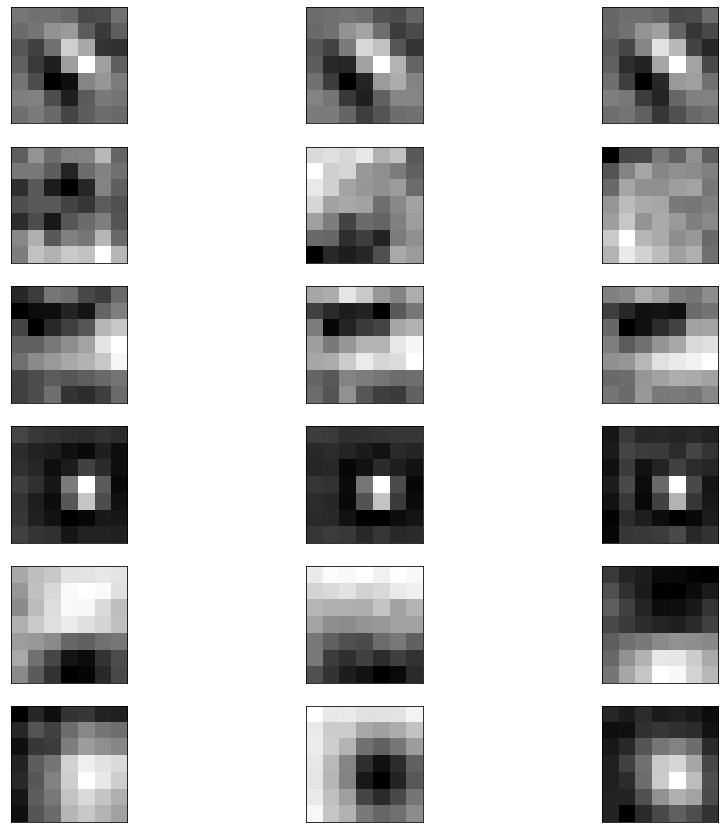

In [78]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1
plt.figure(figsize=(15, 15))
for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(3):
    # specify subplot and turn of axis
    ax = plt.subplot(n_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='gray')
    ix += 1
# show the figure
plt.show()

# Visualize feature maps

In [85]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv1_conv (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 110ms/step


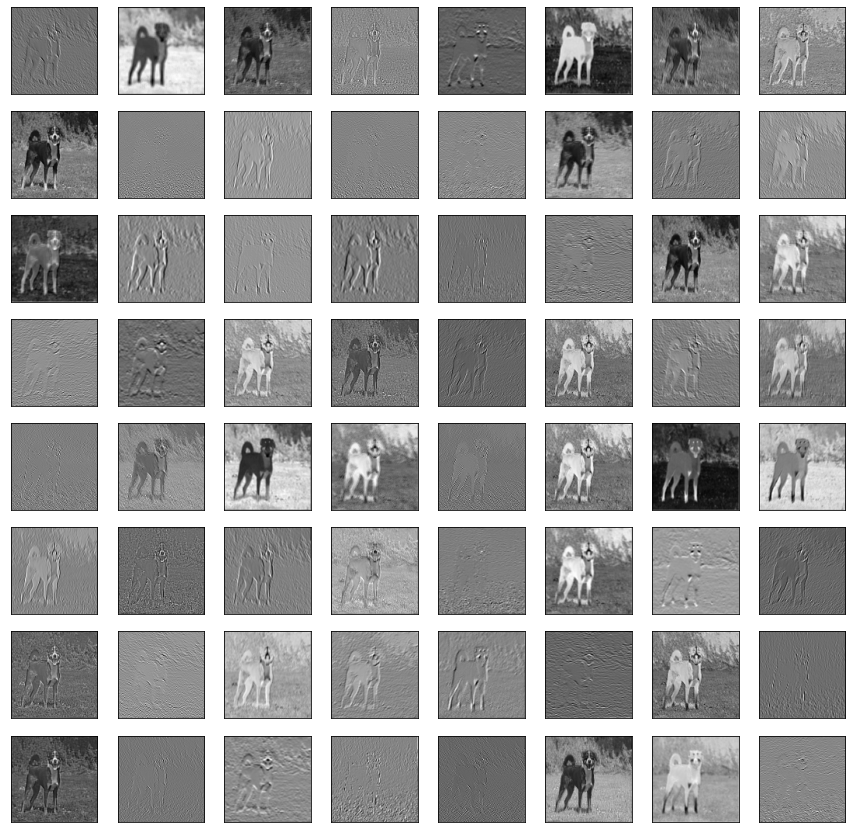

In [91]:
# load the image with the required shape
img = load_img('dog.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(15, 15))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [100]:
# redefine model to output right after the first hidden layer
ixs = [2, 14, 25, 35, 46, 57]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# Predict 
feature_maps = model.predict(img)

# plot the output from each block
square = 8

for idx, fmap in enumerate(feature_maps):
    # plot all 64 maps in an 8x8 squares
    ix = 1
    plt.figure(figsize=(15, 15))
    print(f'\nOutput of block {idx}, layer {ixs[idx]}')
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
            # show the figure
    
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Visualize filters and feature maps side by side

1/1 [==============================] - 1s 554ms/step

Output of block 0, layer 2


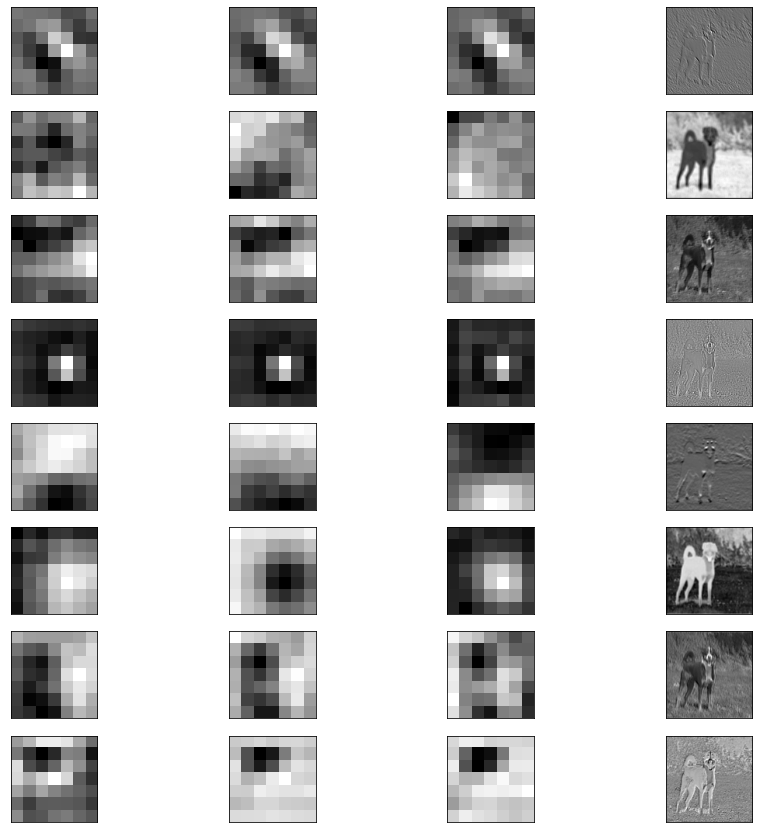


Output of block 1, layer 14


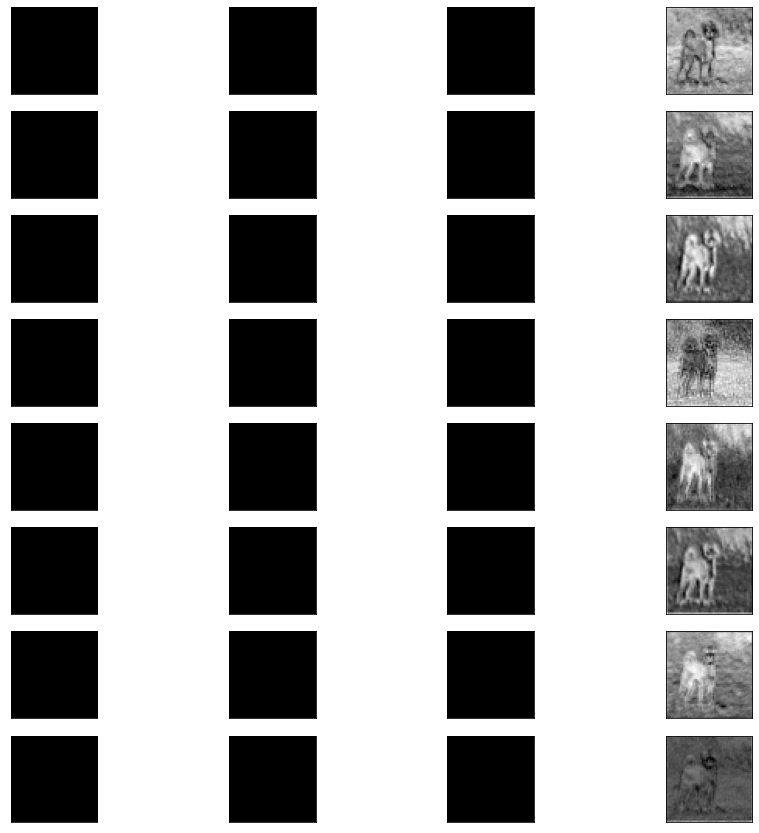


Output of block 2, layer 25


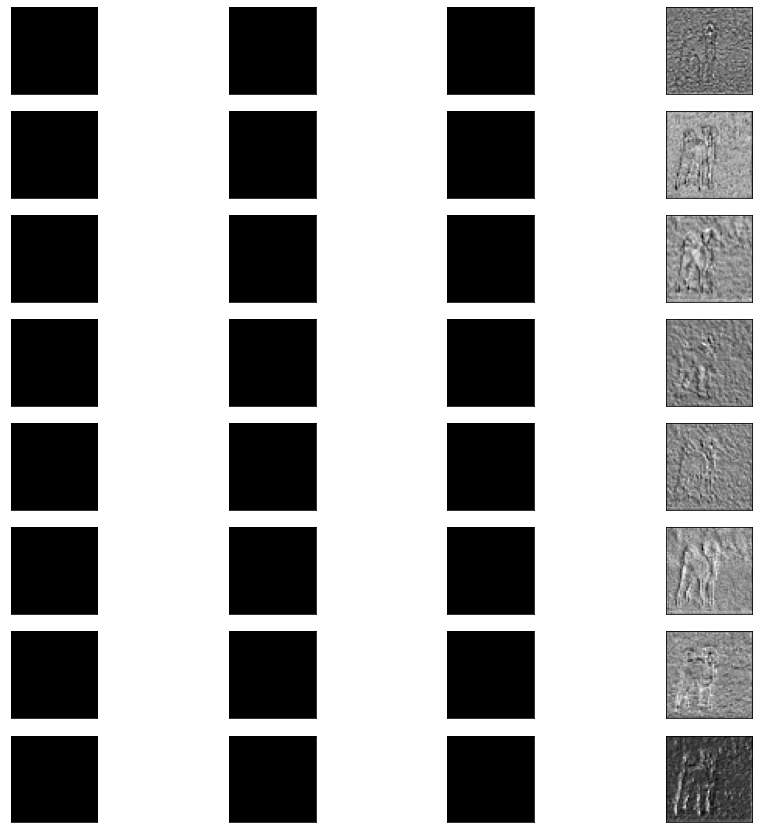


Output of block 3, layer 35


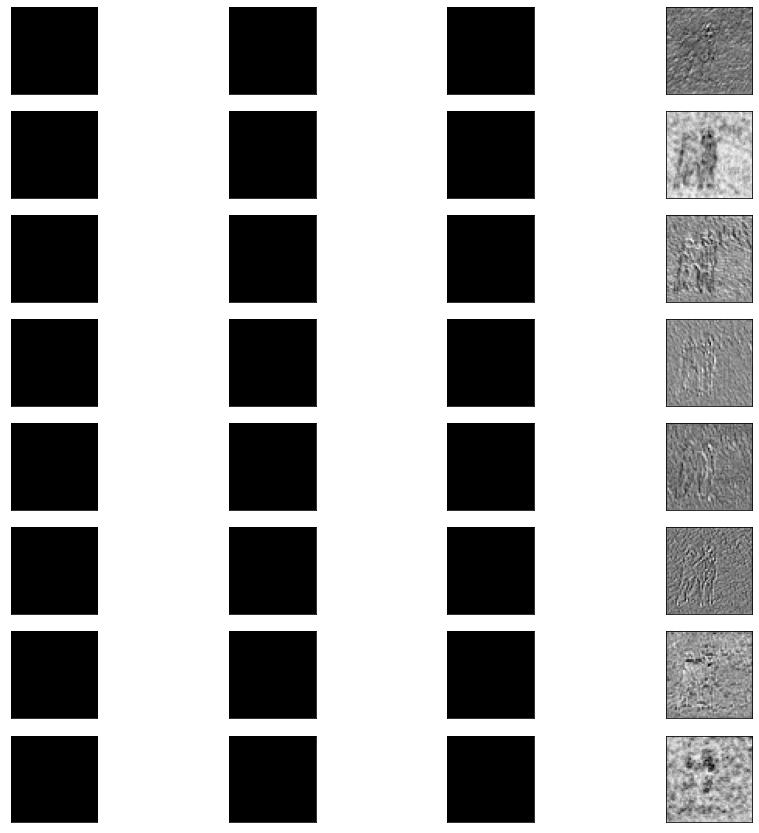


Output of block 4, layer 46


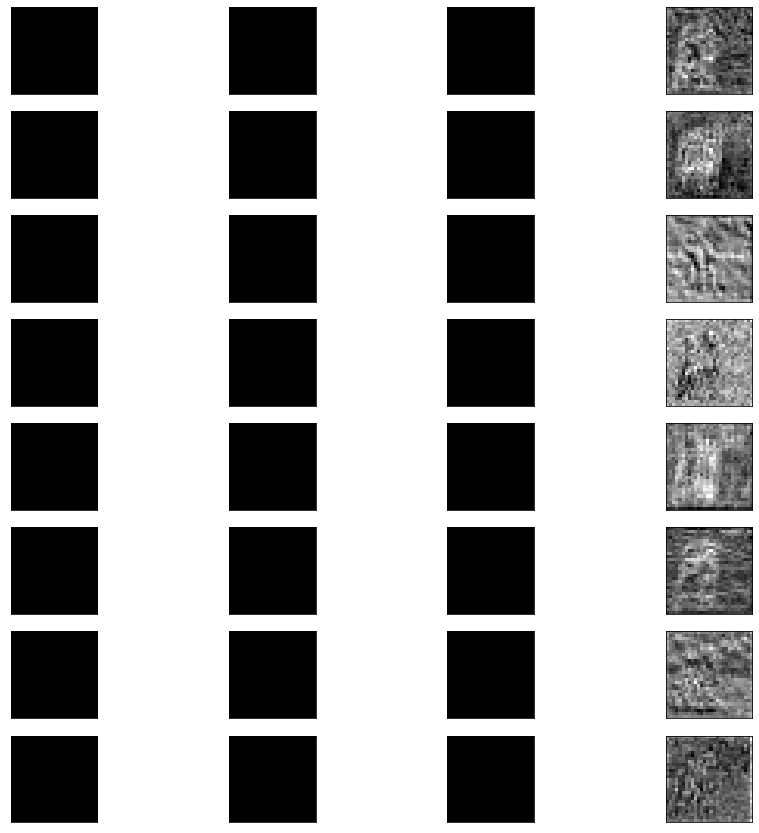


Output of block 5, layer 57


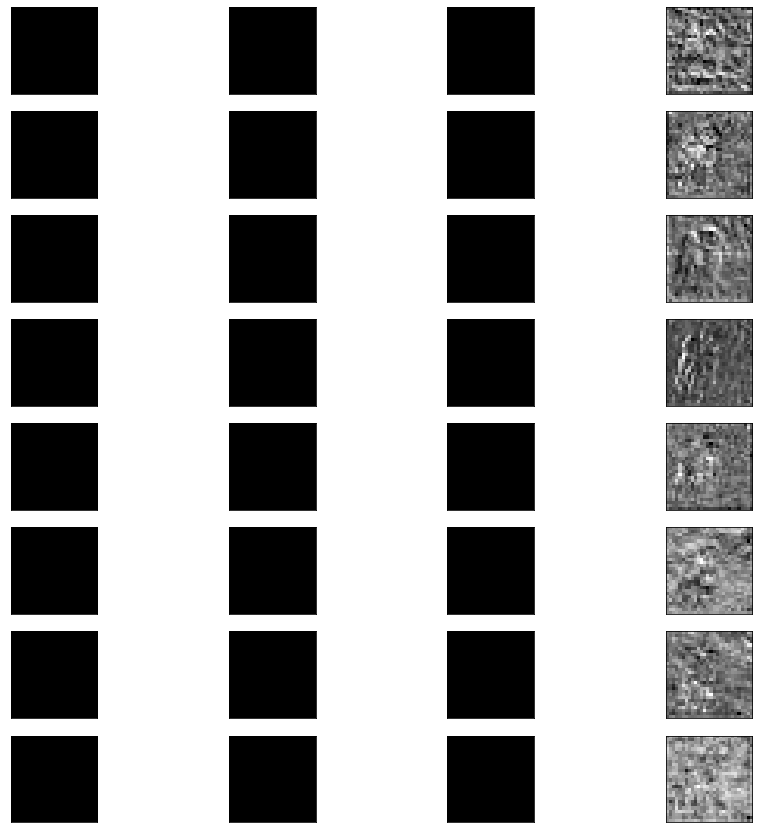

In [102]:
# redefine model to output right after the first hidden layer
ixs = [2, 14, 25, 35, 46, 57]
outputs = [model.layers[i].output for i in ixs]
multi_output_model = Model(inputs=model.inputs, outputs=outputs)

# Predict 
feature_maps = multi_output_model.predict(img)

# plot the output from each block
row = 8
column = 4

for idx, fmap in enumerate(feature_maps):
    # plot all 64 maps in an 8x8 squares
    ix = 1
    img_ix = 1

    filters, biases = model.layers[ixs[idx]].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    plt.figure(figsize=(15, 15))
    print(f'\nOutput of block {idx}, layer {ixs[idx]}')

    for _ in range(row):

        filter = filters[:, :, :, img_ix-1]

        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(row, column, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(filter[:, :, j], cmap='gray')
            ix += 1
            
        # specify subplot and turn of axis
        ax = plt.subplot(row, column, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fmap[0, :, :, img_ix-1], cmap='gray')
        img_ix += 1
        ix += 1
        # show the figure
    
    plt.show()